## Подготовка данных

In [11]:
import pickle
with open("../results/dnn/ecoli_10_10000_1000.data", "rb") as file:
    data_list = pickle.load(file)
data = data_list[0]

In [ ]:
import tensorflow as tf
gpu_fraction = 0.5
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

## Простейшая сверточная модель с тремя фильтрами

In [ ]:
from cnn_models import *
model, history = run_cnn_model_1(data, 2)

Using TensorFlow backend.


Train on 9000 samples, validate on 1000 samples
Epoch 1/100


In [5]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 174us/step


[1.3653511447906495, 0.29499999999999998]

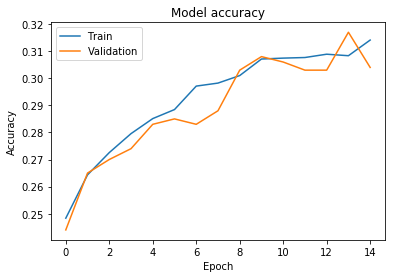

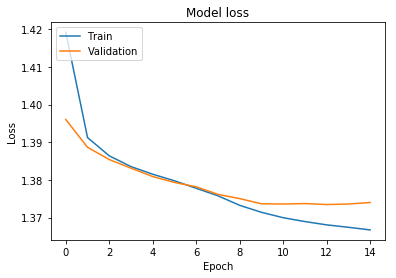

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
with open("../results/cnn/cnn_model_1_all_runs_10_p1.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
print(len(test_accs_1))

10


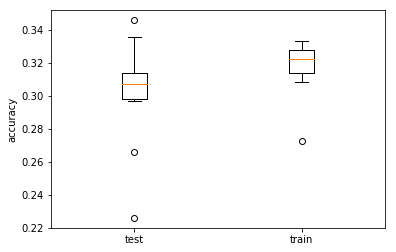

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([test_accs_1, train_accs_1])
plt.xticks([1,2], ('test', 'train'))
plt.ylabel("accuracy")
plt.show()

In [8]:
import scipy.stats
# scipy.stats.wilcoxon(test_accs_1, train_accs_1)
scipy.stats.mannwhitneyu(test_accs_1, train_accs_1)

MannwhitneyuResult(statistic=30.0, pvalue=0.070232524079177475)